In [1]:
from selenium import webdriver

In [3]:
from PIL import Image as pil

##### 이미지 스크린샷
- youtube
- https://www.youtube.com/watch?v=-qt9m8we1m8&t=241s

In [54]:
import time

url = "https://www.youtube.com/watch?v=-qt9m8we1m8&t=100s"
driver = webdriver.Chrome()
driver.get(url)

In [55]:
time.sleep(1) # 이미지 깨짐 방지

driver.save_screenshot("screenshot.png")

True

In [56]:
driver.quit()

(1920, 894)


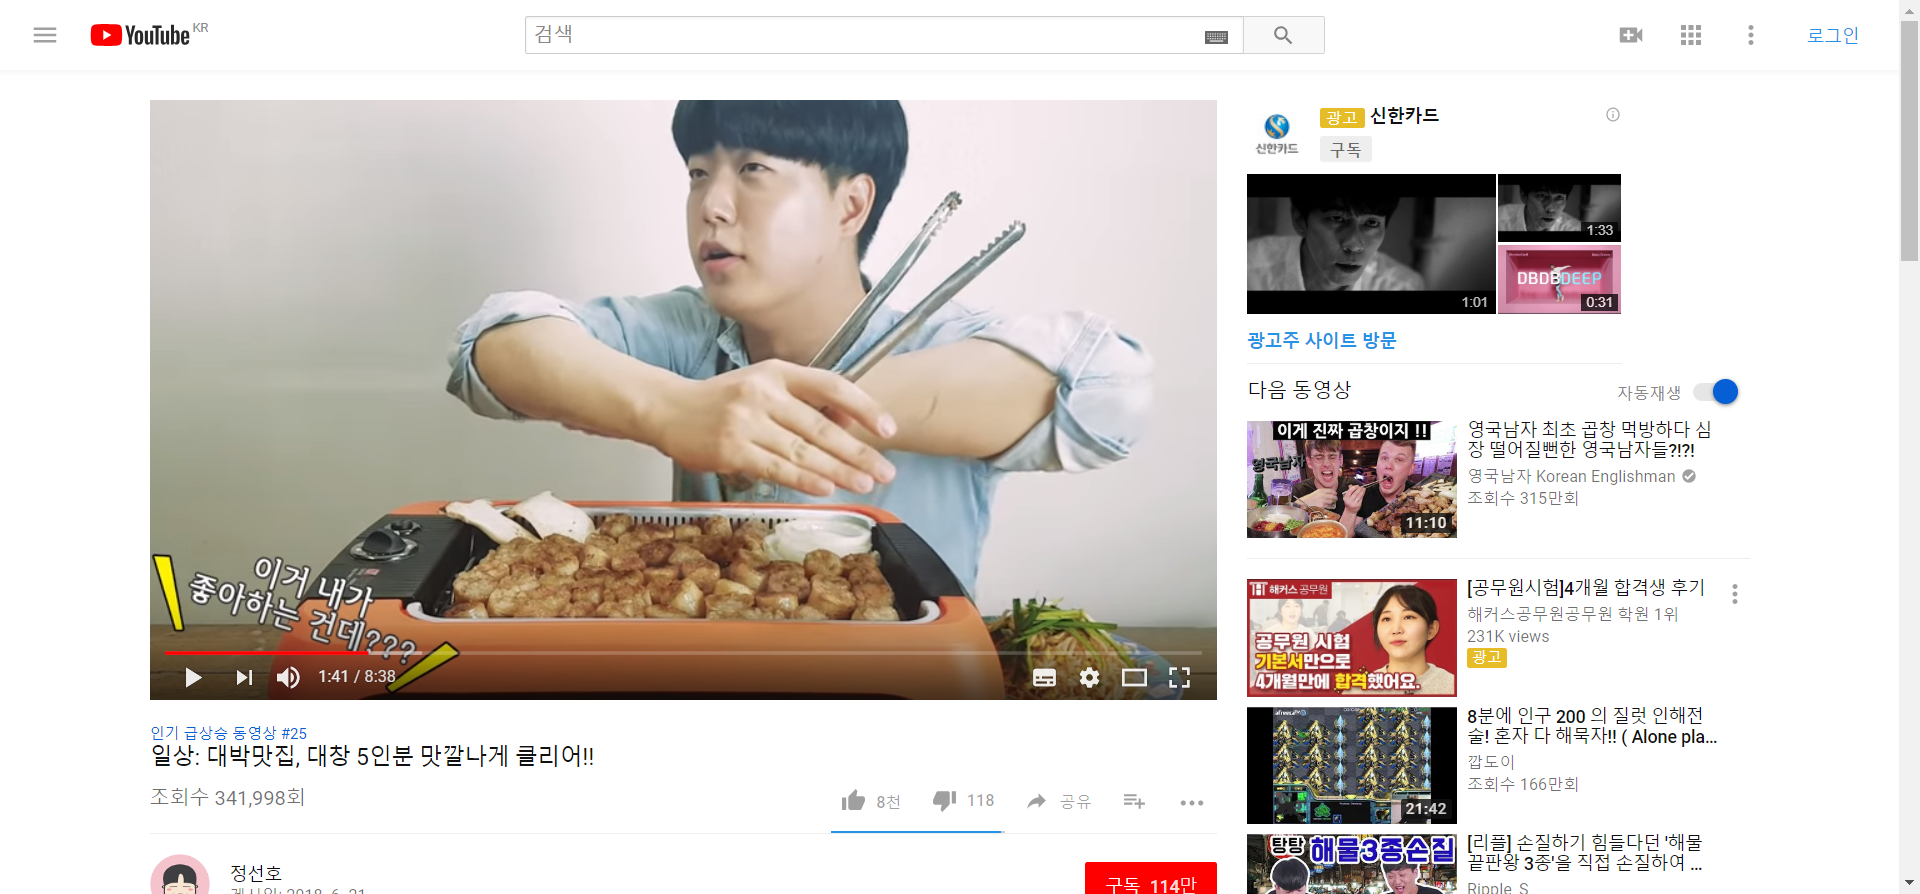

In [115]:
pil_im =  pil.open("screenshot.png")
print(pil_im.size)
pil_im

In [58]:
# id가 player-container인 엘리먼트 영역의 위치값 구하기
driver = webdriver.Chrome()
driver.get(url)

In [116]:
element = driver.find_element_by_css_selector("#player-container")
location = element.location
size = element.size
location, size
# x, y는 동영상의 좌측상단의 좌표

({'x': 120, 'y': 80}, {'height': 480, 'width': 854})

In [93]:
driver.quit()

In [117]:
# top , bottom, left, right
# retina 디스플레이의 경우 right, bottom에 *2를 해줘야함 
# 모니터마다 해상도가 달라서 조정해줘야함.
left = location['x']
top = location['y']
right = left + size['width'] * 1.3
bottom = top + size['height'] * 1.3
area = (left, top, right, bottom)
area

(120, 80, 1230.2, 704.0)

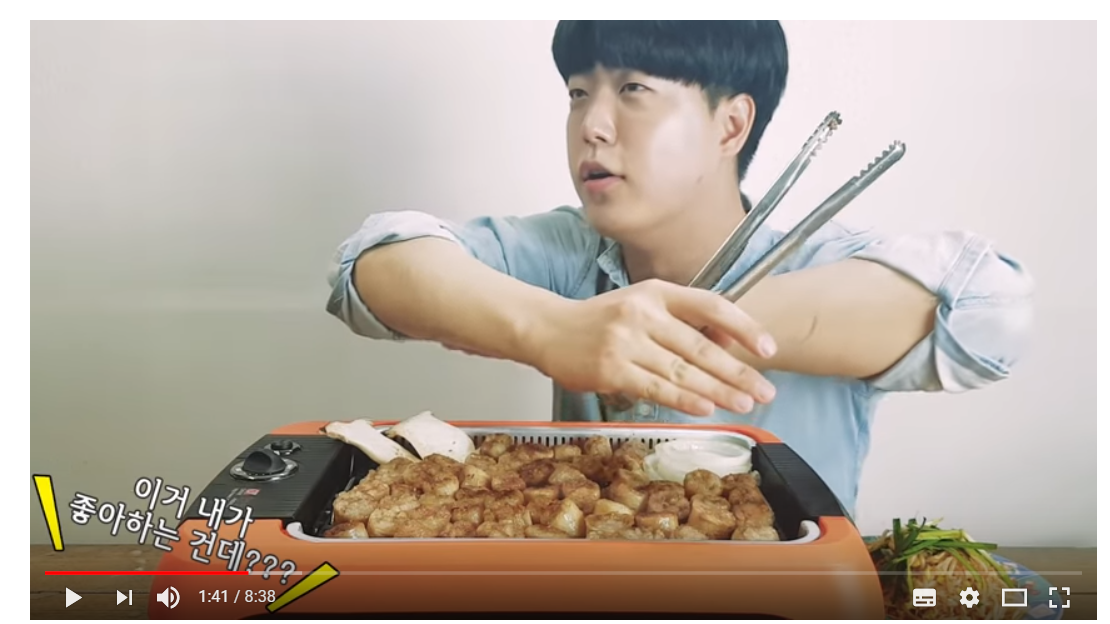

In [122]:
pil_im = pil.open("screenshot.png")
pil_im = pil_im.crop(area)
pil_im

In [123]:
pil_im.save("screenshot_element.png")

In [137]:
driver.quit()

In [97]:
# 하단 재생 기능영역 자르기
driver = webdriver.Chrome()
driver.get(url)

In [98]:
element = driver.find_element_by_css_selector('.ytp-chrome-bottom')
play_height = element.size['height']
location = element.location
size = element.size
location, size

({'x': 132, 'y': 521}, {'height': 39, 'width': 830})

In [104]:
left = location['x']
top = location['y']
right = left + size['width']
bottom = top + size['height']
area = (left, top, right, bottom)
area

(132, 521, 962, 521)

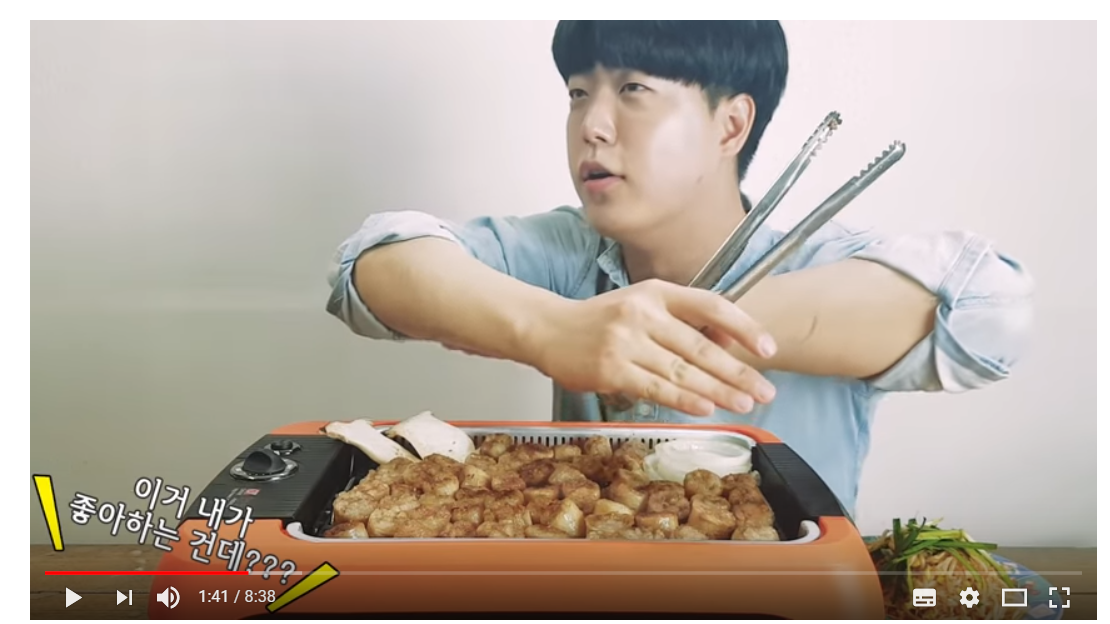

In [124]:
pil_im = pil.open("screenshot_element.png")
# pil_im = pil_im.crop(area)
pil_im

In [125]:
# 썸네일 만들기
pil_im.thumbnail((320,160))

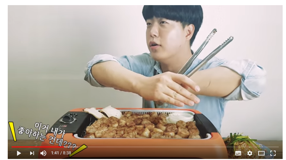

In [126]:
pil_im

In [127]:
pil_im.save("thumbnail.png")

In [135]:
# vision api 사용
url = "https://cloud.google.com/vision/"
driver = webdriver.Chrome()
driver.get(url)

iframe = driver.find_element_by_css_selector('#vision_demo_section > iframe')
driver.switch_to_frame(iframe)

file_path = "C:/dss/dev/TIL/web_programming/screenshot_element.png"
driver.find_element_by_css_selector("#input").send_keys(file_path)

In [136]:
driver.find_element_by_css_selector("#webDetection").click()

ElementNotVisibleException: Message: element not visible
  (Session info: chrome=67.0.3396.87)
  (Driver info: chromedriver=2.35.528161 (5b82f2d2aae0ca24b877009200ced9065a772e73),platform=Windows NT 10.0.17134 x86_64)


In [132]:
results = driver.find_elements_by_css_selector("#card .container > .row")[:15]
# 상위 15개만 필요 & 출력
for result in results:
    print(
    result.find_element_by_css_selector('.name').text,
    result.find_element_by_css_selector('.score').text,
    )